In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.helpers import *

In [18]:
#Function to calcualte the cumulative return of the strategy
def transform_cumulative_returns(summary_df):

    # Extract the first entry of test_cum_return
    first_cum_return = summary_df['test_cum_return'].iloc[0] + 1
    
    # Apply cumprod() to last_time_step_return starting from the second entry
    cumulative_returns = summary_df['last_time_step_return'].iloc[1:].cumprod()
    
    # Combine the first entry of test_cum_return with the cumulative returns
    transformed_returns = pd.concat([
        pd.Series([first_cum_return]),  # First entry
        cumulative_returns * first_cum_return  # Cumulative returns scaled by the first entry
    ], ignore_index=True)
    
    return transformed_returns

In [19]:
def plot_transformed_cumulative_return(input_df, summary_df, name_df ,start_index, transform_function):

    # Apply the transformation
    transformed_returns = transform_function(summary_df)

    # Add the transformed returns to the DataFrame
    summary_df['transformed_cum_return'] = transformed_returns

    # Plot the transformed cumulative returns
    plt.plot(
        input_df.iloc[start_index:]["date"], 
        summary_df['transformed_cum_return'], 
        label='Transformed Cumulative Return'
    )

    # Add labels, title, and legend
    plt.xlabel('Date')
    plt.ylabel('Backtest Result')
    plt.title(f'Backtest Result for Strategy_{name_df}')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


In [20]:
#Read the summary dataframes of the strategies
strategy_1_input = read_file("./data/processed/input_df_analysis_1(Tesla_News_on_Tesla_Price).parquet")
strategy_1_output = read_file("./data/processed/summary_df_analysis_1(Tesla_News_on_Tesla_Price).parquet")

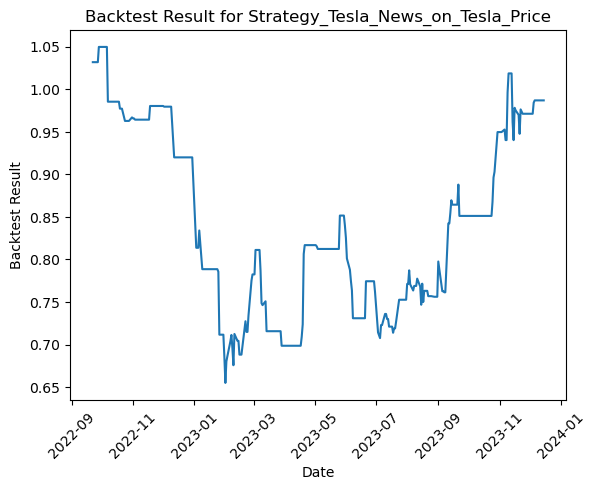

In [21]:
plot_transformed_cumulative_return(strategy_1_input,strategy_1_output,"Tesla_News_on_Tesla_Price",99,transform_cumulative_returns)

In [24]:
strategy_2_input = read_file("./data/processed/input_df_analysis_2(Crypto_News_on_Doge_Price).parquet")
strategy_2_output = read_file( "./data/processed/summary_df_analysis_2(Crypto_News_on_Doge_Price).parquet")
strategy_3_input = read_file("./data/processed/input_df_analysis_3(Crypto_News+Tweets_on_Doge_Price).parquet")
strategy_3_output = read_file("./data/processed/summary_df_analysis_3(Crypto_News+Tweets_on_Doge_Price).parquet")
strategy_4_input = read_file("./data/processed/input_df_analysis_4(Crypto_News+Tweets+Tesla_News_on_Doge_Price).parquet")
strategy_4_output = read_file( "./data/processed/summary_df_analysis_4(Crypto_News+Tweets+Tesla_News_on_Doge_Price).parquet")

In [32]:
def plot_transformed_backtest_results(input_dfs, summary_dfs, name_dfs, start_index, transform_function):
    """
    Plots transformed cumulative returns for multiple strategies on the same plot.

    Parameters:
    - input_dfs: List of input DataFrames containing the 'date' column.
    - summary_dfs: List of summary DataFrames where transformed returns will be added.
    - name_dfs: List of names corresponding to the strategies.
    - start_index: Starting index for slicing the data for each plot.
    - transform_function: Function used to transform cumulative returns.

    Returns:
    - None. Displays a single plot with multiple lines.
    """
    if not (len(input_dfs) == len(summary_dfs) == len(name_dfs)):
        raise ValueError("The input_dfs, summary_dfs, and name_dfs lists must have the same length.")

    plt.figure(figsize=(12, 6))  # Create a single figure for the combined plot

    for i in range(len(input_dfs)):
        # Extract current DataFrame and strategy name
        input_df = input_dfs[i]
        summary_df = summary_dfs[i]
        name_df = name_dfs[i]

        # Apply the transformation
        transformed_returns = transform_function(summary_df)

        # Add the transformed returns to the DataFrame
        summary_df['transformed_cum_return'] = transformed_returns

        # Plot the transformed cumulative returns
        plt.plot(
            input_df.iloc[start_index:]["date"], 
            summary_df['transformed_cum_return'], 
            label=f'Strategy {name_df}'
        )

    # Add labels, title, and legend
    plt.xlabel('Date')
    plt.ylabel('Backtest Result')
    plt.title('Backtest Results for Strategies on Doge Coin')
    plt.legend()

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Show the combined plot
    plt.show()


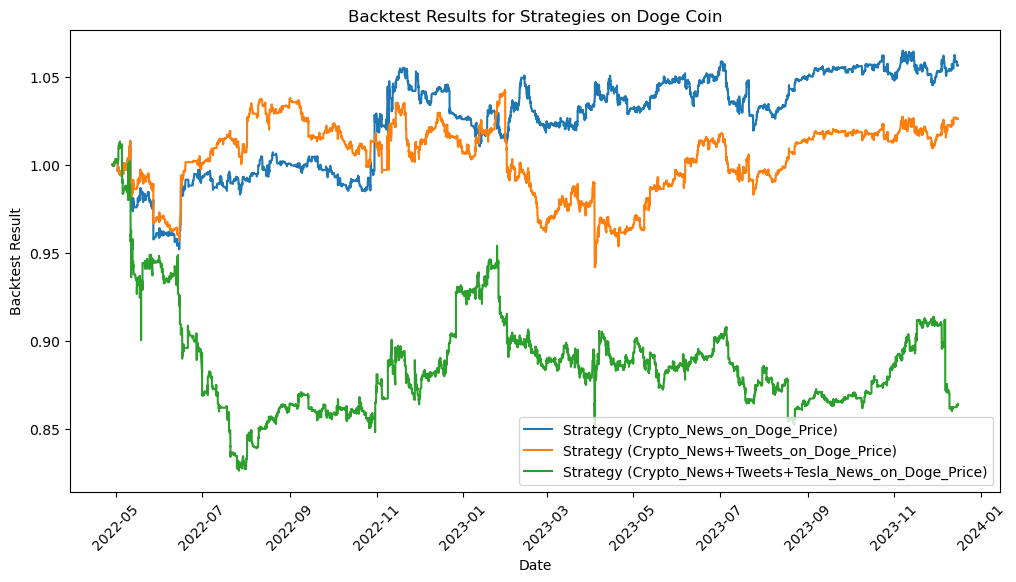

In [33]:
plot_transformed_backtest_results([strategy_2_input,strategy_3_input,strategy_4_input],
                                  [strategy_2_output,strategy_3_output,strategy_4_output],
                                  ["(Crypto_News_on_Doge_Price)","(Crypto_News+Tweets_on_Doge_Price)","(Crypto_News+Tweets+Tesla_News_on_Doge_Price)"],
                                  999,
                                  transform_cumulative_returns)